## Análisis de Información Recopilada - Clase Espejo Logro Académico

### Paso 1: Cargue de librerías

In [2]:
import warnings
warnings.filterwarnings('ignore')

##Librerías importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Preprocesado y análisis
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

##Librerías de ML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from datetime import datetime

### Cargue de la data

In [3]:
datos = pd.read_csv('./datosFinalesL.csv', sep=';', encoding='latin1')
datos.head()
datos.shape

(103, 26)

### Paso 2: Pre procesamiento de la data

In [4]:
##Renombrar las columnas
datos.columns = ['DemoEstrato','DemoEdad','DemoGenero','DemoSemestre','DemoPadres','DemoLaborando','DemoEsMental','DemoEsFisico','DemoTrabajo','Pedag1','Pedag2','Pedag3','Pedag4','Pedag5','Pedag6','Pedag7','Pedag8','Pedag9','Pedag10','Pedag11','Pedag12','Pedag13','Pedag14','Pedag15','Pedag16','LogroAca']
datos.head()

data = datos.drop(['LogroAca'],axis=1)

In [5]:
##Demográficos
round(datos.DemoEstrato.value_counts()/np.float64(len(datos)),2)*100

##El 63% de la población es de estrato 2, 21% estrato 1 y el restante 16% estrato 3,4 y 5

DemoEstrato
2    63.0
1    21.0
3    10.0
4     4.0
5     2.0
Name: count, dtype: float64

In [6]:
round(datos.DemoEdad.value_counts()/np.float64(len(datos)),2)*100
#El 63% de la población se encuentran en el rango de edad 21 a 25 años
#El 21% entre 17 -20 años y el restante 16% son mayores de 25 años.

DemoEdad
2    63.0
1    21.0
3    16.0
Name: count, dtype: float64

In [7]:
round(datos.DemoGenero.value_counts()/np.float64(len(datos)),2)*100
#El 65% de los encuestados son hombres y el 35% son mujeres

DemoGenero
1    65.0
2    35.0
Name: count, dtype: float64

In [8]:
round(datos.DemoSemestre.value_counts()/np.float64(len(datos)),2)*100
#El 45% de las personas encuestadas pertenecen a decimo semestre, el 21% al noveno semestre, el 18% a septimo semestre y el 16% final a quinto semestre.

DemoSemestre
10    45.0
9     21.0
7     18.0
5     16.0
Name: count, dtype: float64

In [9]:
pd.crosstab(datos.DemoGenero, datos.DemoPadres, margins=True, margins_name="Total")
  #37 estudiantes del género masculino no viven con sus padres actualmente, 30 estudiantes del género masculino si conviven con sus padres
  #En el caso de las mujeres la relación es 17 no viven con sus padres y 19 si lo hacen actualmente.

DemoPadres   0   1  Total
DemoGenero               
1           37  30     67
2           17  19     36
Total       54  49    103

In [10]:
pd.crosstab(datos.DemoEstrato, datos.DemoPadres, margins=True, margins_name="Total")
#54 estudiantes de estratos 1 y 2 es donde se encuentran el mayor número que no vive con los padres.

DemoPadres    0   1  Total
DemoEstrato               
1            14   8     22
2            34  31     65
3             5   5     10
4             1   3      4
5             0   2      2
Total        54  49    103

In [11]:
pd.crosstab(datos.DemoEstrato, datos.DemoLaborando, margins=True, margins_name="Total")
#68 personas de los estratos 1,2,3,4 y5 no se encuentran laborando actualmente. 
# Los estratos 1 y 2 son los que mayor cantidad poblacional tienen en esa situacion

DemoLaborando   0   1  Total
DemoEstrato                 
1              15   7     22
2              40  25     65
3               9   1     10
4               3   1      4
5               1   1      2
Total          68  35    103

In [12]:
pd.crosstab(datos.DemoGenero, datos.DemoEsMental, margins=True, margins_name="Total")
#41 hombres aducen que su trabajo no implica esfuerzo mental de igual manera 27 mujeres confirman la misma tendencia.

DemoEsMental   0  2   3   4  5  Total
DemoGenero                           
1             41  1   9   8  8     67
2             27  1   6   2  0     36
Total         68  2  15  10  8    103

### Paso 3: Gráficas mas Relevantes

In [13]:
colors = ['#2ECC71','#3498DB', '#9B59B6','#E67E22', '#F1C40F']
def drawChart(dim, column1, column2, texto1, texto2, explod, preguntaC, sizes):
    f, ax = plt.subplots(1,2, figsize=(sizes[0],sizes[1]))
    f.suptitle('Dimensión {} Pregunta {} \n {}'.format(dim,column2, preguntaC), x= 0.5, y =1.05, fontsize=18, weight='bold')
    
    ##Grafica Matplotlib
    datos[column2].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], 
                                             shadow=True, 
                                             explode= explod, fontsize=12, 
                                             colors=colors)
    ax[0].set_title(texto1, fontsize=14)
    ax[0].set_xlabel('', fontsize=12)
    ax[0].set_ylabel('', fontsize=12)
    ax[0].legend(['4 Siempre', '3 Casi siempre', '2 Algunas Veces','1 Casi Nunca', '0 Nunca'],loc=2, fontsize=10)
    
    
    ##Grafica seaborn '#fb8c00','#0288d1','#00e676','#ff5722','#ffeb3b','#e040fb'
    plot = sns.countplot(x= column1, data=datos,hue=column2,  ax=ax[1], palette=colors)
    for i in plot.patches:
        plot.annotate(i.get_height(),
                      (i.get_x() + i.get_width()/2, i.get_height()),
                      ha='center', va='baseline', fontsize=12, 
                     color='black', xytext=(0,1),
                     textcoords='offset points')
    ax[1].set_title(texto2,fontsize=14)
    ax[1].set_xlabel('', fontsize=12)
    ax[1].set_ylabel('', fontsize=12)
    ax[1].tick_params(labelsize=14)
    
    plt.legend(labels = ['0 Nunca', '1 Casi Nunca','2 Algunas Veces', '3 Casi siempre','4 Siempre'], fontsize=10)
    plt.show() 

def drawChart2(dim, column1, column2, texto2, question, sizes):
  f, ax = plt.subplots(figsize=(sizes[0],sizes[1]))
  f.suptitle('Dimensión {} Pregunta {} \n {}'.format(dim,column2, question), x= 0.5, y =1.05, fontsize=18, weight='bold')

  plot = sns.countplot(x= column2, data=datos,hue=column1, palette=colors)
  for i in plot.patches:
      plot.annotate(i.get_height(),
                    (i.get_x() + i.get_width()/2, i.get_height()),
                    ha='center', va='baseline', fontsize=12, 
                    color='black', xytext=(0,1),
                    textcoords='offset points')
  ax.set_title(texto2,fontsize=14)
  ax.set_xlabel('', fontsize=12)
  ax.set_ylabel('', fontsize=12)
  ax.tick_params(labelsize=14)
  
  plt.legend(labels = ['0 Nunca', '1 Casi Nunca','2 Algunas Veces', '3 Casi siempre','4 Siempre'],fontsize=10)
  plt.show() 


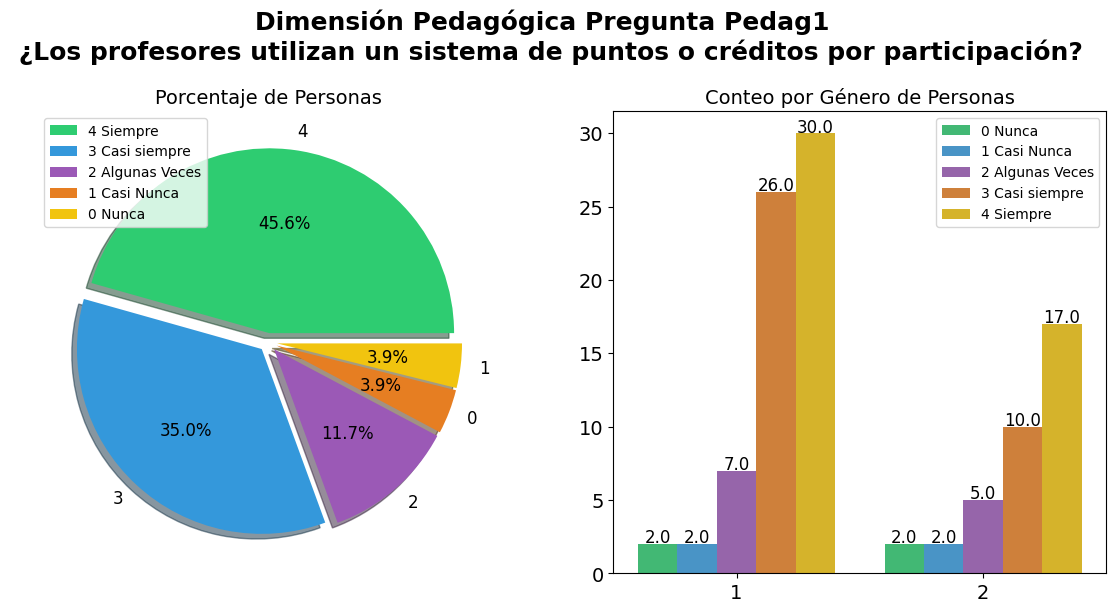

In [14]:
drawChart('Pedagógica','DemoGenero','Pedag1', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05, 0.05, 0.05,0.05), 
          '¿Los profesores utilizan un sistema de puntos o créditos por participación?', sizes=[14,6])
#0 Nunca 
#1 Casi nunca 
#2 Algunas veces  
#3 Casi siempre 
#4 Siempre 
#el 45,6% de los encuestados aducen que los docentes si utilizan un sistema de puntos o créditos por participación en la clase espejo.
#Un 8% aduce que nunca se utiliza dicho sistema.

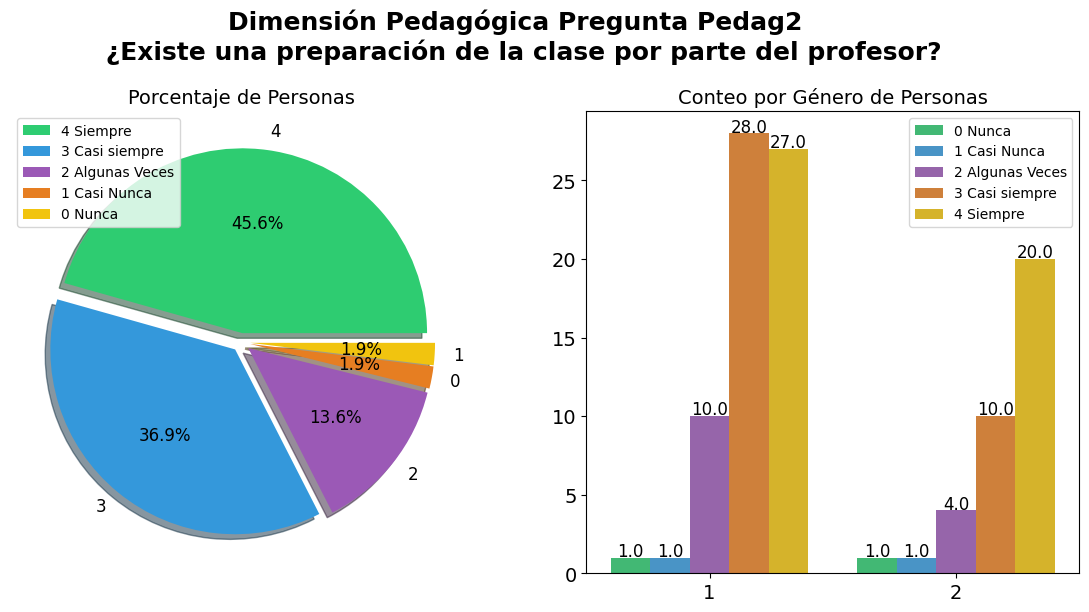

In [15]:
drawChart('Pedagógica','DemoGenero','Pedag2', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Existe una preparación de la clase por parte del profesor?', sizes=[14,6])
          #el 45,6% de los encuestados aducen que los docentes casi siempre preparan la clase espejo a impartir. Un 4% reconoce que no existe preparación 
          #para dicho encuentro.

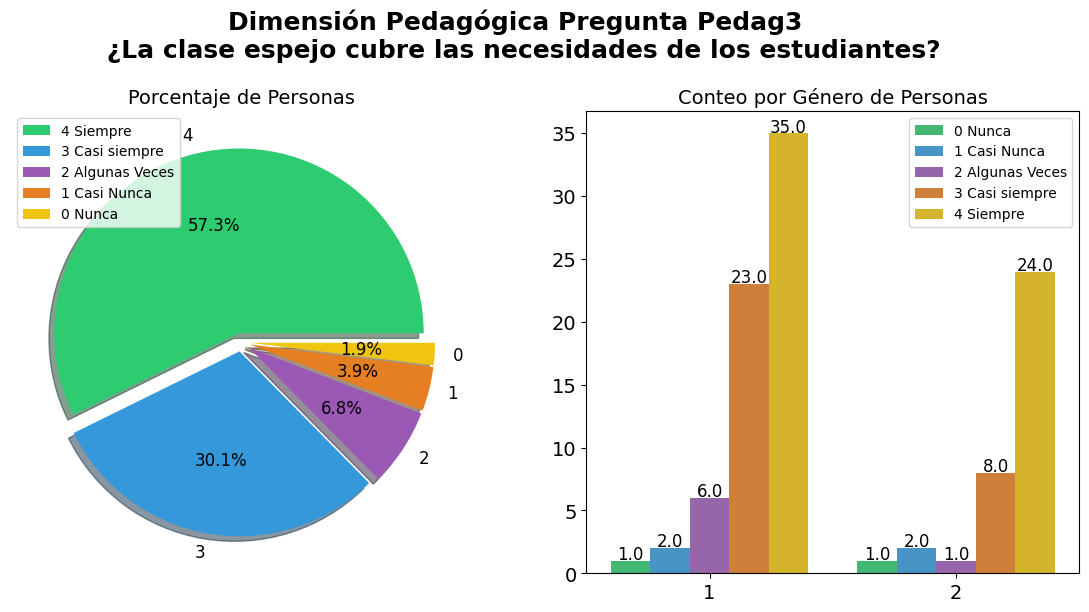

In [16]:
drawChart('Pedagógica','DemoGenero','Pedag3', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿La clase espejo cubre las necesidades de los estudiantes?', sizes=[14,6])
          #El 57.3% de las personas aducen que casi siempre se cubre con las necesidades de los estudiantes en la clase espejo.

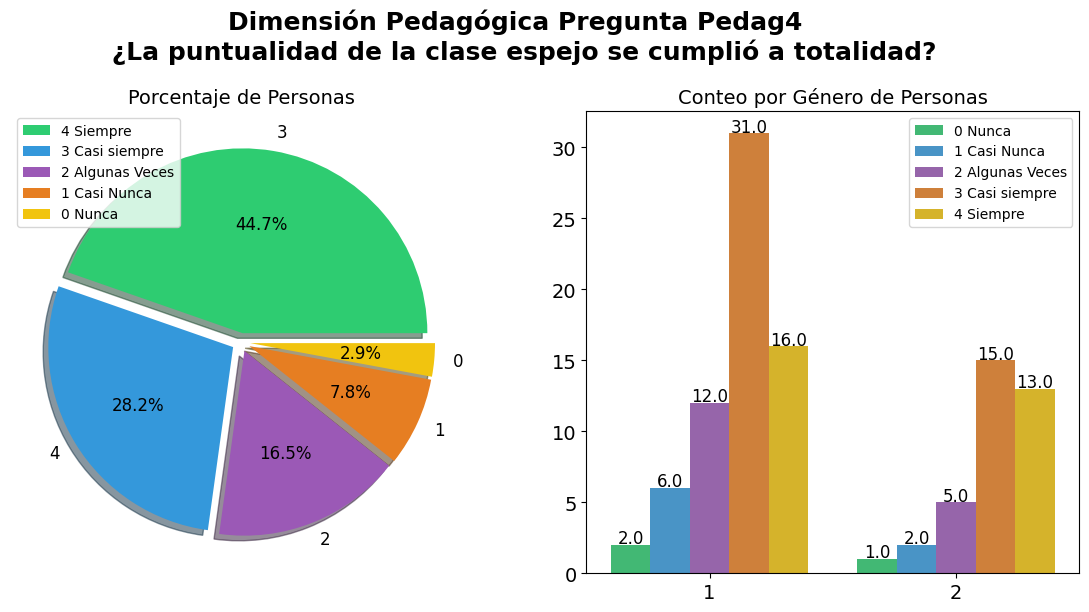

In [17]:
drawChart('Pedagógica','DemoGenero','Pedag4', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿La puntualidad de la clase espejo se cumplió a totalidad?', sizes=[14,6])
##El 44,7% de los estudiantes afirman que casi siempre se cumple con el horario de la clase espejo. Un 11% aduce que no se cumple con los horarios
#pactados

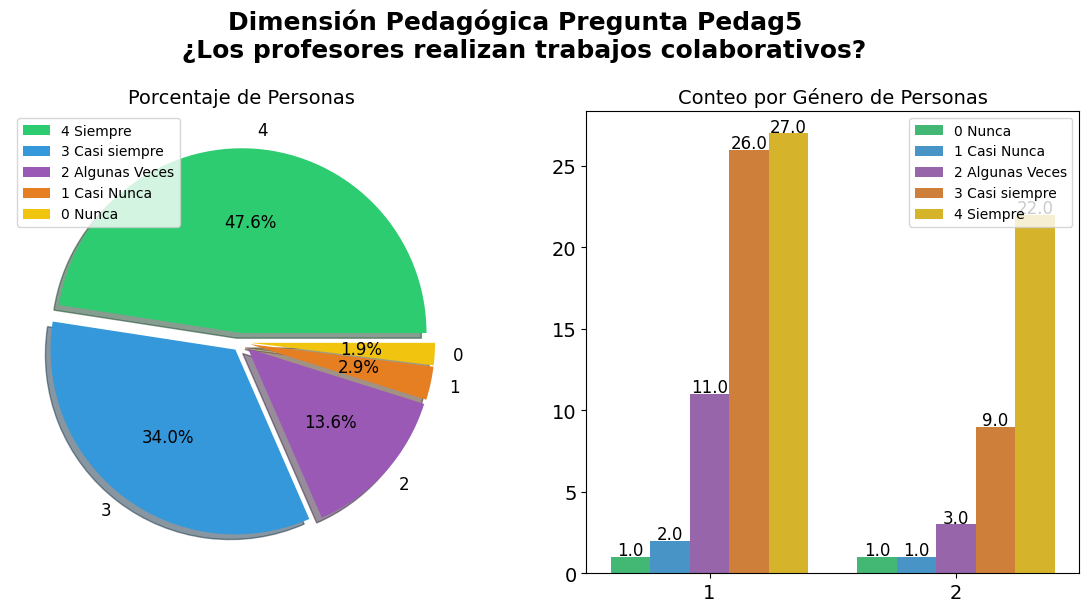

In [18]:
drawChart('Pedagógica','DemoGenero','Pedag5', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores realizan trabajos colaborativos?', sizes=[14,6])
#Algunas veces los profesores realizan trabajos colaborativos durante la clase espejo con un 13,6% de los estudiantes lo afirman

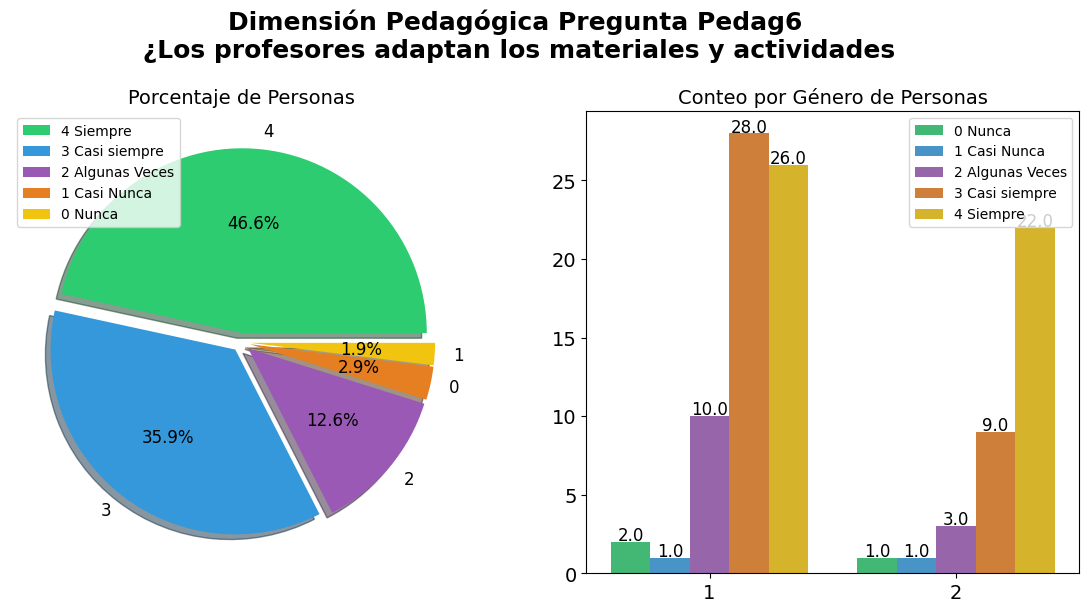

In [19]:
drawChart('Pedagógica','DemoGenero','Pedag6', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores adaptan los materiales y actividades ', sizes=[14,6])
# 

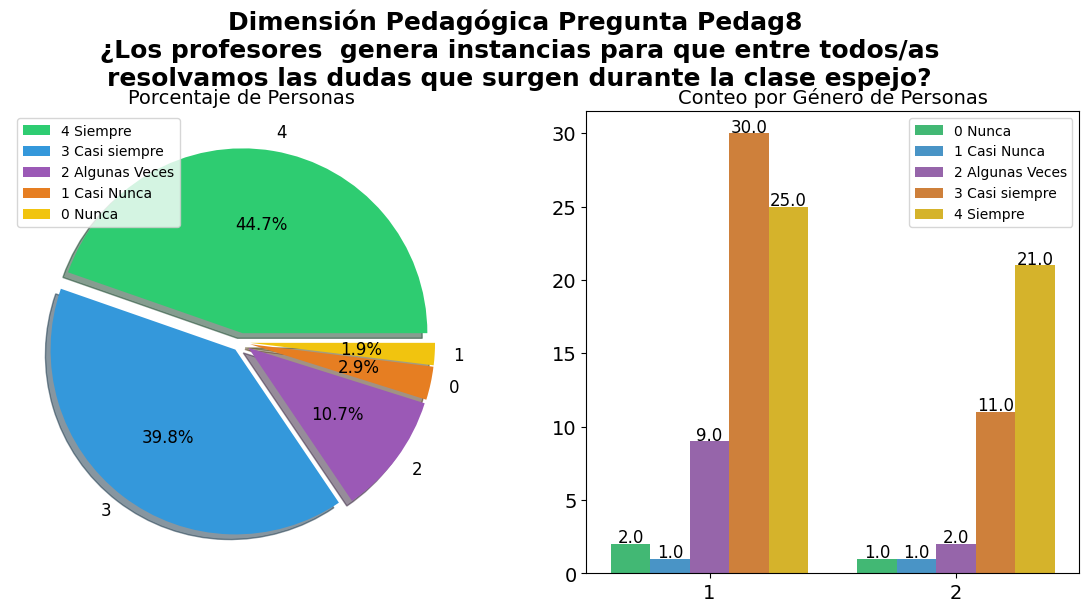

In [20]:
drawChart('Pedagógica','DemoGenero','Pedag8', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores  genera instancias para que entre todos/as \nresolvamos las dudas que surgen durante la clase espejo?', sizes=[14,6])
##El 44,7% de los estudiantes afirman que siempre los profesores generan espacios para aclarar dudas.

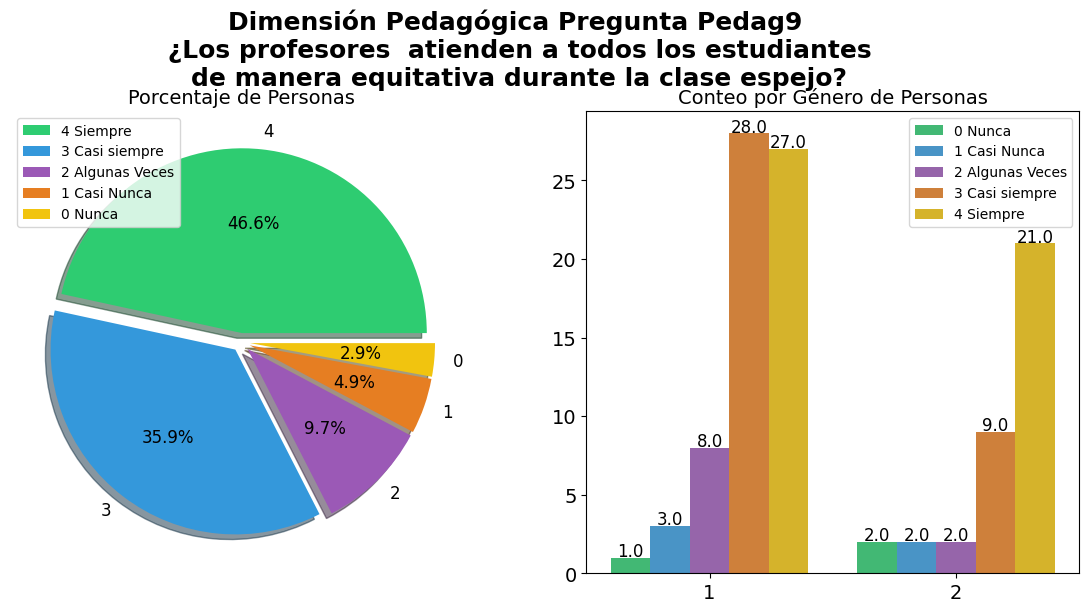

In [21]:
drawChart('Pedagógica','DemoGenero','Pedag9', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores  atienden a todos los estudiantes \nde manera equitativa durante la clase espejo?', sizes=[14,6])
          #9,7% de los estudiantes evidencian que no son atendidas sus dudas en las clases espejo.

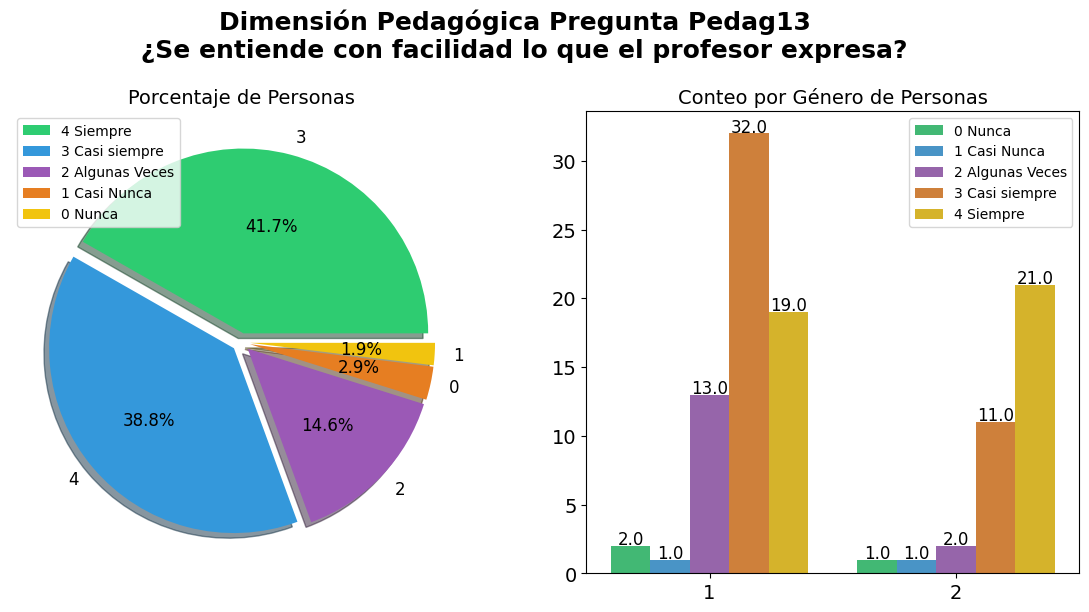

In [22]:
drawChart('Pedagógica','DemoGenero','Pedag13', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Se entiende con facilidad lo que el profesor expresa?', sizes=[14,6])
    #41,7% aducen que casi siempre se entiende lo que el profesor expresa.un 18% reconoce que no se entiende lo explicado por el docente.

In [23]:
datos['LogroAca'].value_counts()

LogroAca
Se cumple Aceptable     70
Se cumple Alto Grado    26
Se cumple Bajo Grado     7
Name: count, dtype: int64

### Paso 4: Normalización, Test de Normalidad, Correlación de Pearson y Alpha de Cronbach

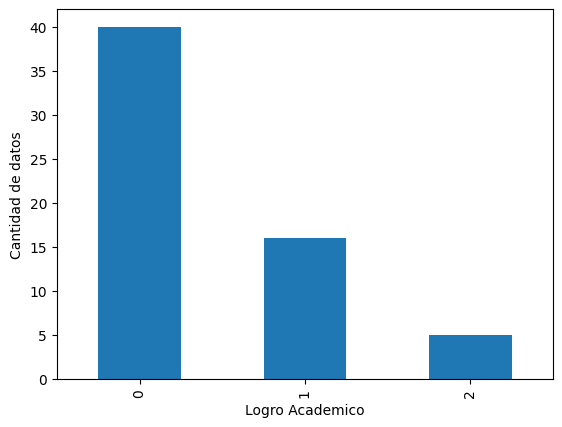

In [24]:

#!pip install scikit-plot
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
datos['LogroAca']= label_encoder.fit_transform(datos['LogroAca']) 

## Balance de carga de variables
features = []
for feature in datos.columns:
    if feature != 'LogroAca':
        features.append(feature)
X = datos[features]
y = datos['LogroAca']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=100)

import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Cantidad de datos')
plt.xlabel('Logro Academico')
plt.show()

## Balanceo de datos con RESAMPLE Clase MAYORITARIA

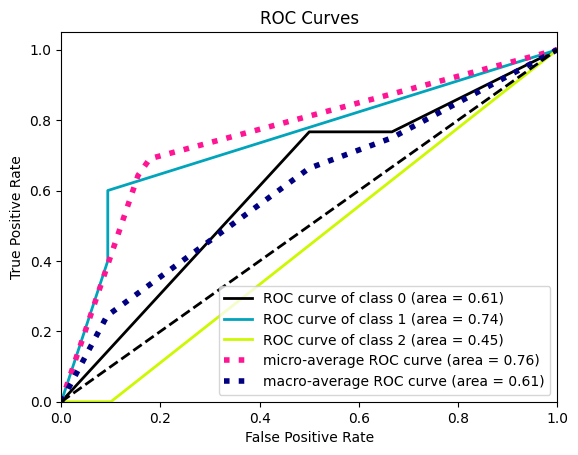

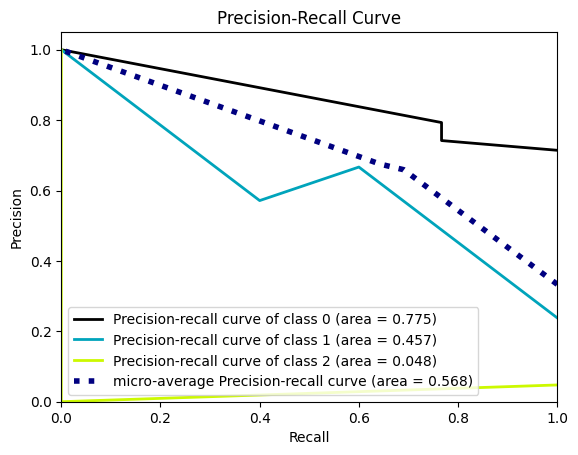

F1-score: 0.6506865041098406


In [93]:
#!pip install scikit-plot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score: {f1}')

In [28]:
y_train.value_counts()

LogroAca
0    40
1    16
2     5
Name: count, dtype: int64

In [29]:
y_test.value_counts()

LogroAca
0    30
1    10
2     2
Name: count, dtype: int64

In [30]:
#!pip install -U imbalanced-learn
from sklearn.utils import resample
import pandas as pd

def balance_data(X_train, y_train, strategy='oversample', reference_counts=None):
    """
    Balancea los datos de entrenamiento utilizando resample para oversampling o undersampling.
    
    Args:
    X_train (pd.DataFrame o np.ndarray): Conjunto de características de entrenamiento.
    y_train (pd.Series o np.ndarray): Conjunto de etiquetas de entrenamiento.
    strategy (str): Método de balanceo a utilizar ('oversample' o 'undersample').
    reference_counts (dict, opcional): Número de muestras de referencia para cada categoría. Debe ser un diccionario
                                        con claves como 0, 1 y 2, y valores correspondientes al número de muestras deseadas.
    
    Returns:
    X_res (pd.DataFrame), y_res (pd.Series): Conjuntos de datos balanceados en formato DataFrame y Series.
    """
    if strategy not in ['oversample', 'undersample']:
        raise ValueError("El método debe ser uno de los siguientes: 'oversample' o 'undersample'")
    
    if reference_counts is None:
        raise ValueError("Debe proporcionar un diccionario 'reference_counts' con el número de muestras deseadas para cada categoría")
    
    # Convertir X_train y y_train a DataFrame y Series si no lo son
    if not isinstance(X_train, pd.DataFrame):
        X_train = pd.DataFrame(X_train)
    if not isinstance(y_train, pd.Series):
        y_train = pd.Series(y_train)
    
    # Crear listas para almacenar los datos balanceados
    X_resampled = []
    y_resampled = []
    
    # Aplicar oversampling o undersampling según la estrategia especificada
    for category, count in reference_counts.items():
        X_category = X_train[y_train == category]
        y_category = y_train[y_train == category]
        
        if strategy == 'oversample':
            X_resampled_category, y_resampled_category = resample(X_category, 
                                                                  y_category,
                                                                  replace=True,     # muestra con reemplazo
                                                                  n_samples=count,  # número de muestras deseadas
                                                                  random_state=42)  # para reproducibilidad
        
        elif strategy == 'undersample':
            X_resampled_category, y_resampled_category = resample(X_category, 
                                                                  y_category,
                                                                  replace=False,    # muestra sin reemplazo
                                                                  n_samples=count,  # número de muestras deseadas
                                                                  random_state=42)  # para reproducibilidad
        
        X_resampled.append(X_resampled_category)
        y_resampled.append(y_resampled_category)
    
    # Concatenar todas las muestras resampleadas
    X_res = pd.concat(X_resampled)
    y_res = pd.concat(y_resampled)
    
    return X_res, y_res


# Balancear los datos usando oversampling con referencia a las siguientes cantidades por categoría
reference_counts = {0: 40, 1: 40, 2: 40}
X_res_train_over, y_res_train_over = balance_data(X_train, y_train, strategy='oversample', reference_counts=reference_counts)
print("Oversampling results:\n", y_res_train_over.value_counts())

reference_counts_d = {0: 30, 1: 30, 2: 30}
X_res_test_over, y_res_test_over = balance_data(X_test, y_test, strategy='oversample', reference_counts=reference_counts_d)
print("Oversampling results:\n", y_res_test_over.value_counts())

# Balancear los datos usando undersampling con referencia a las siguientes cantidades por categoría
#reference_counts = {0: 7, 1: 7, 2: 7}
#X_res_under, y_res_under = balance_data(X_train, y_train, strategy='undersample', reference_counts=reference_counts)
#print("Undersampling results:\n", y_res_under.value_counts())



Oversampling results:
 LogroAca
0    40
1    40
2    40
Name: count, dtype: int64
Oversampling results:
 LogroAca
0    30
1    30
2    30
Name: count, dtype: int64


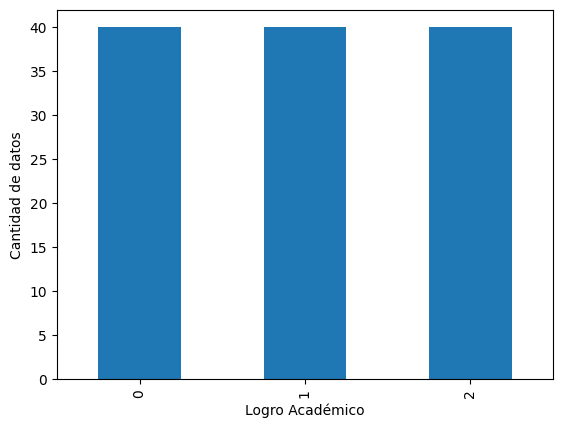

In [31]:
count = y_res_train_over.value_counts()
count.plot.bar()
plt.ylabel('Cantidad de datos')
plt.xlabel('Logro Académico')
plt.show()

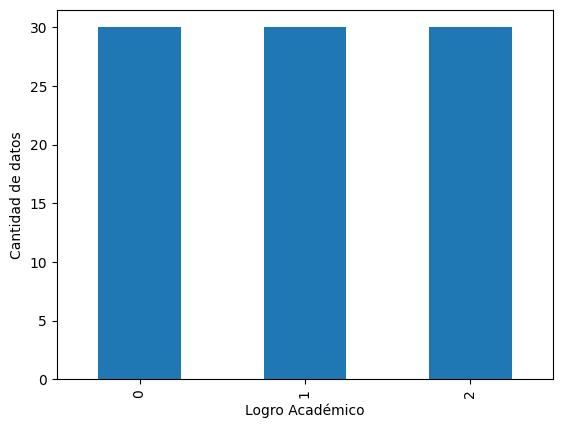

In [32]:
count = y_res_test_over.value_counts()
count.plot.bar()
plt.ylabel('Cantidad de datos')
plt.xlabel('Logro Académico')
plt.show()

In [33]:
from sklearn.utils import class_weight
clases = np.unique(y_res_train_over)
cw = class_weight.compute_class_weight(class_weight='balanced', classes=clases, y=y_res_train_over)
weights = dict(zip(clases,cw))

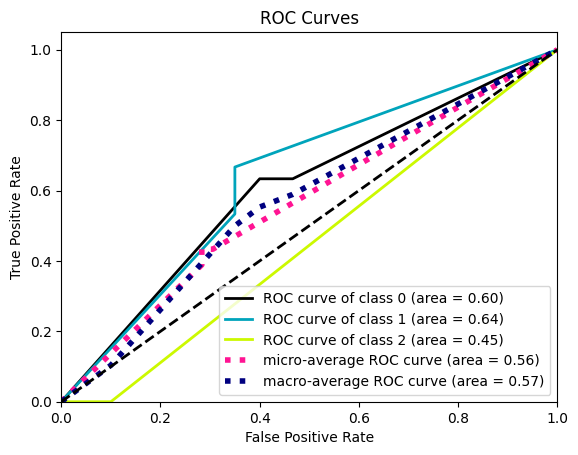

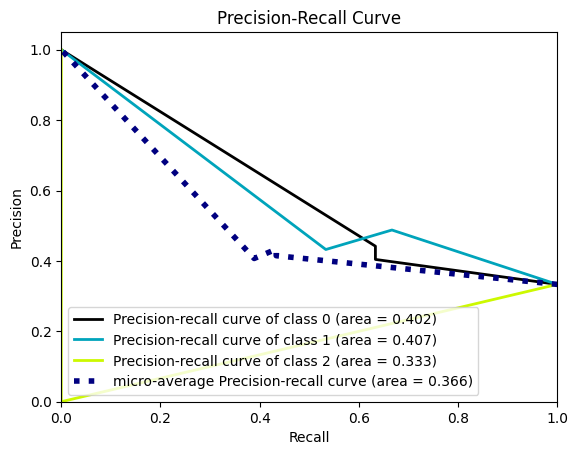

F1-score: 0.3613094089652068


In [95]:
model = DecisionTreeClassifier(class_weight=weights, random_state=42)
model.fit(X_res_train_over, y_res_train_over)
y_score = model.predict_proba(X_res_test_over)
y_pred = model.predict(X_res_test_over)# Plot metrics 
plot_roc(y_res_test_over, y_score)
plt.show()
    
plot_precision_recall(y_res_test_over, y_score)
plt.show()

f1 = f1_score(y_res_test_over, y_pred, average='weighted')
print(f'F1-score: {f1}')

### Balanceo de datos con clase mayoritaria SMOTE

Notas

    Verificar el número de muestras en cada clase antes y después de aplicar SMOTE es una buena práctica para asegurarse de que el sobremuestreo se ha realizado correctamente.
    Ajustar k_neighbors según el tamaño de la clase minoritaria es crucial para evitar el error mencionado.

    Ejemplo

Supongamos que tienes las siguientes clases y número de muestras:

    Clase 0: 5 muestras
    Clase 1: 50 muestras
    Clase 2: 100 muestras

En este caso, la clase minoritaria es la Clase 0 con 5 muestras.

El valor máximo de k_neighbors para SMOTE debe ser menor o igual a 5 - 1 = 4. Por lo tanto, k_neighbors debería ser 4 o menos.

In [35]:
from imblearn.over_sampling import SMOTE
import pandas as pd

def smote_oversample(X_train, y_train, reference_counts):
    """
    Balancea los datos de entrenamiento utilizando SMOTE para oversampling.
    
    Args:
    X_train (pd.DataFrame o np.ndarray): Conjunto de características de entrenamiento.
    y_train (pd.Series o np.ndarray): Conjunto de etiquetas de entrenamiento.
    reference_counts (dict): Número de muestras de referencia para cada categoría. Debe ser un diccionario
                             con claves como 0, 1 y 2, y valores correspondientes al número de muestras deseadas.
    
    Returns:
    X_res (pd.DataFrame), y_res (pd.Series): Conjuntos de datos balanceados en formato DataFrame y Series.
    """
    # Convertir X_train y y_train a DataFrame y Series si no lo son
    if not isinstance(X_train, pd.DataFrame):
        X_train = pd.DataFrame(X_train)
    if not isinstance(y_train, pd.Series):
        y_train = pd.Series(y_train)
    
    # Definir la estrategia de SMOTE basada en los valores de referencia_counts
    smote = SMOTE(sampling_strategy=reference_counts, random_state=42, k_neighbors=4)
    
    # Aplicar SMOTE para generar el oversampling
    X_res, y_res = smote.fit_resample(X_train, y_train)
    
    # Convertir X_res y y_res a DataFrame y Series si no lo son
    if not isinstance(X_res, pd.DataFrame):
        X_res = pd.DataFrame(X_res, columns=X_train.columns)
    if not isinstance(y_res, pd.Series):
        y_res = pd.Series(y_res, name='target')
    
    return X_res, y_res

# Balancear los datos usando oversampling con referencia a las siguientes cantidades por categoría
reference_counts = {0: 40, 1: 40, 2: 40}
X_train_res_Smote, y_train_res_Smote = smote_oversample(X_train, y_train, reference_counts)
print("Oversampling results:\n", y_train_res_Smote.value_counts())



Oversampling results:
 LogroAca
0    40
2    40
1    40
Name: count, dtype: int64


In [36]:
from sklearn.utils import class_weight
clases = np.unique(y_train_res_Smote)
cw = class_weight.compute_class_weight(class_weight='balanced', classes=clases, y=y_train_res_Smote)
weights = dict(zip(clases,cw))

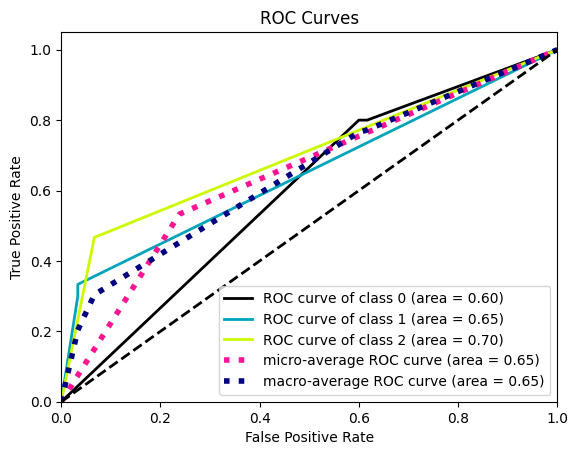

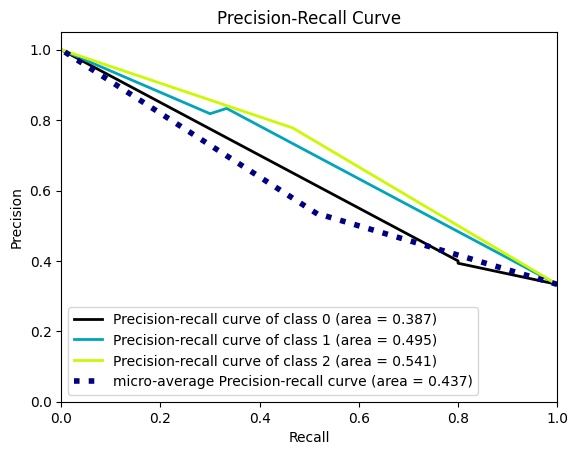

F1-score: 0.5166100836832545


In [96]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight=weights, random_state=42)
model.fit(X_train_res_Smote, y_train_res_Smote)
y_score = model.predict_proba(X_res_test_over)
y_pred = model.predict(X_res_test_over)# Plot metrics 
plot_roc(y_res_test_over, y_score)
plt.show()
    
plot_precision_recall(y_res_test_over, y_score)
plt.show()

f1 = f1_score(y_res_test_over, y_pred, average='weighted')
print(f'F1-score: {f1}')


## Resumen
mejoría de SMOTE por encima de imbalanced learn, pero faltán escoger las mejores características y crear los modelos.

    SMOTE (Synthetic Minority Over-sampling Technique):
        Pros:
            Genera muestras sintéticas que se asemejan a las muestras reales, lo que puede mejorar la calidad de los datos.
            Útil para conjuntos de datos desbalanceados donde las clases minoritarias están subrepresentadas.
        Contras:
            Puede generar muestras sintéticas que no reflejan fielmente la distribución de las clases minoritarias reales, lo que puede llevar a un sobreajuste.
            Requiere ajustar parámetros como k_neighbors, lo que puede ser un proceso de prueba y error.

    resample (de la librería sklearn.utils):
        Pros:
            Es más simple de usar y no requiere ajuste de parámetros.
            Puede ser más adecuado para conjuntos de datos pequeños o cuando se necesita un control más fino sobre el proceso de balanceo.
        Contras:
            No genera muestras sintéticas, lo que puede resultar en una pérdida de información si las clases minoritarias son muy escasas.

En general, si tienes un conjunto de datos desbalanceado y necesitas generar más muestras para las clases minoritarias, SMOTE podría ser una buena opción. Sin embargo, si prefieres una solución más simple o si tus clases minoritarias ya tienen suficientes muestras representativas, resample podría ser más adecuado.

SMOTE: X_train_res_Smote, y_train_res_Smote
RESAMPLE: X_res_train_over, y_res_train_over
TEST: X_res_test_over, y_res_test_over


#### Normalizar datos trabajados con SMOTE

In [38]:
datosVie = data
dataLista = X_train_res_Smote

valores = dataLista.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=dataLista.columns)

normalizados = scaler.transform(valores)
X_train_norm_SMOTE = pd.DataFrame(normalizados,
                              index=dataLista.index,
                              columns=dataLista.columns)

In [39]:
datosVie = data
dataLista = X_res_test_over

valores = dataLista.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=dataLista.columns)

normalizados = scaler.transform(valores)
X_test_norm_SMOTE = pd.DataFrame(normalizados,
                              index=dataLista.index,
                              columns=dataLista.columns)

In [40]:
#Shapiro Wilk 
from scipy.stats import shapiro
valoresP=[]
concepto=[]
variable=[]

def iterarCol(df):
    for column in df:
        stat, p = shapiro(df[column].values)
        valoresP.append(p)
        variable.append(column)
        if (p < 0.05):
            #print(f'No es una variable Normal: {column}')
            #print('==========================================================')
            concepto.append('No es una variable Normal')
        else:
            #print(f'Es una variable Normal: {column}')
            #print('==========================================================')
            concepto.append('Es una variable Normal')
       
iterarCol(X_train_norm_SMOTE)


df = pd.DataFrame({'Variable':variable, 'Valores P':valoresP, 'Concepto':concepto})

df

Variable     Valores P                   Concepto
0     DemoEstrato  2.876962e-12  No es una variable Normal
1        DemoEdad  6.838943e-13  No es una variable Normal
2      DemoGenero  3.732841e-18  No es una variable Normal
3    DemoSemestre  1.329524e-11  No es una variable Normal
4      DemoPadres  5.010446e-16  No es una variable Normal
5   DemoLaborando  6.395894e-19  No es una variable Normal
6    DemoEsMental  2.410953e-14  No es una variable Normal
7    DemoEsFisico  7.650081e-15  No es una variable Normal
8     DemoTrabajo  2.429457e-14  No es una variable Normal
9          Pedag1  6.169174e-11  No es una variable Normal
10         Pedag2  2.053530e-11  No es una variable Normal
11         Pedag3  3.656575e-12  No es una variable Normal
12         Pedag4  4.784036e-08  No es una variable Normal
13         Pedag5  6.436651e-10  No es una variable Normal
14         Pedag6  3.227233e-11  No es una variable Normal
15         Pedag7  5.361765e-09  No es una variable Normal
16         Pedag8  8.015328e-11  No es una variable Normal
17         Pedag9  6.519873e-10  No es una variable Normal
18        Pedag10  1.751882e-10  No es una variable Normal
19        Pedag11  1.055987e-10  No es una variable Normal
20        Pedag12  4.728665e-09  No es una variable Normal
21        Pedag13  1.106777e-09  No es una variable Normal
22        Pedag14  1.009968e-10  No es una variable Normal
23        Pedag15  2.857128e-10  No es una variable Normal
24        Pedag16  1.212324e-11  No es una variable Normal

In [41]:
iterarCol(X_test_norm_SMOTE)

df = pd.DataFrame({'Variable':variable, 'Valores P':valoresP, 'Concepto':concepto})

df

Variable     Valores P                   Concepto
0     DemoEstrato  2.876962e-12  No es una variable Normal
1        DemoEdad  6.838943e-13  No es una variable Normal
2      DemoGenero  3.732841e-18  No es una variable Normal
3    DemoSemestre  1.329524e-11  No es una variable Normal
4      DemoPadres  5.010446e-16  No es una variable Normal
5   DemoLaborando  6.395894e-19  No es una variable Normal
6    DemoEsMental  2.410953e-14  No es una variable Normal
7    DemoEsFisico  7.650081e-15  No es una variable Normal
8     DemoTrabajo  2.429457e-14  No es una variable Normal
9          Pedag1  6.169174e-11  No es una variable Normal
10         Pedag2  2.053530e-11  No es una variable Normal
11         Pedag3  3.656575e-12  No es una variable Normal
12         Pedag4  4.784036e-08  No es una variable Normal
13         Pedag5  6.436651e-10  No es una variable Normal
14         Pedag6  3.227233e-11  No es una variable Normal
15         Pedag7  5.361765e-09  No es una variable Normal
16         Pedag8  8.015328e-11  No es una variable Normal
17         Pedag9  6.519873e-10  No es una variable Normal
18        Pedag10  1.751882e-10  No es una variable Normal
19        Pedag11  1.055987e-10  No es una variable Normal
20        Pedag12  4.728665e-09  No es una variable Normal
21        Pedag13  1.106777e-09  No es una variable Normal
22        Pedag14  1.009968e-10  No es una variable Normal
23        Pedag15  2.857128e-10  No es una variable Normal
24        Pedag16  1.212324e-11  No es una variable Normal
25    DemoEstrato  1.106514e-11  No es una variable Normal
26       DemoEdad  2.071411e-15  No es una variable Normal
27     DemoGenero  1.708697e-14  No es una variable Normal
28   DemoSemestre  5.662395e-13  No es una variable Normal
29     DemoPadres  5.971128e-14  No es una variable Normal
30  DemoLaborando  9.926469e-15  No es una variable Normal
31   DemoEsMental  4.428193e-14  No es una variable Normal
32   DemoEsFisico  6.027760e-14  No es una variable Normal
33    DemoTrabajo  1.662875e-14  No es una variable Normal
34         Pedag1  1.055540e-12  No es una variable Normal
35         Pedag2  1.571398e-11  No es una variable Normal
36         Pedag3  3.017903e-12  No es una variable Normal
37         Pedag4  2.022575e-10  No es una variable Normal
38         Pedag5  5.972008e-09  No es una variable Normal
39         Pedag6  7.748271e-11  No es una variable Normal
40         Pedag7  1.588447e-10  No es una variable Normal
41         Pedag8  9.060891e-11  No es una variable Normal
42         Pedag9  2.318529e-10  No es una variable Normal
43        Pedag10  1.295543e-10  No es una variable Normal
44        Pedag11  1.195827e-10  No es una variable Normal
45        Pedag12  3.189467e-10  No es una variable Normal
46        Pedag13  3.557616e-10  No es una variable Normal
47        Pedag14  2.726173e-09  No es una variable Normal
48        Pedag15  1.224120e-09  No es una variable Normal
49        Pedag16  3.141987e-09  No es una variable Normal

In [42]:

corr_matrix = X_train_norm_SMOTE.corr(method='pearson')

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
tidy_corr_matrix(corr_matrix).head(30)

variable_1    variable_2         r     abs_r
206   DemoTrabajo  DemoEsMental  0.934523  0.934523
158  DemoEsMental   DemoTrabajo  0.934523  0.934523
183  DemoEsFisico   DemoTrabajo  0.929626  0.929626
207   DemoTrabajo  DemoEsFisico  0.929626  0.929626
421        Pedag8       Pedag13  0.921157  0.921157
541       Pedag13        Pedag8  0.921157  0.921157
157  DemoEsMental  DemoEsFisico  0.915759  0.915759
181  DemoEsFisico  DemoEsMental  0.915759  0.915759
538       Pedag13        Pedag5  0.911839  0.911839
346        Pedag5       Pedag13  0.911839  0.911839
343        Pedag5       Pedag10  0.900141  0.900141
463       Pedag10        Pedag5  0.900141  0.900141
469       Pedag10       Pedag11  0.898403  0.898403
493       Pedag11       Pedag10  0.898403  0.898403
389        Pedag7        Pedag6  0.895454  0.895454
365        Pedag6        Pedag7  0.895454  0.895454
547       Pedag13       Pedag14  0.894894  0.894894
571       Pedag14       Pedag13  0.894894  0.894894
467       Pedag10        Pedag9  0.893614  0.893614
443        Pedag9       Pedag10  0.893614  0.893614
348        Pedag5       Pedag15  0.885658  0.885658
588       Pedag15        Pedag5  0.885658  0.885658
471       Pedag10       Pedag13  0.885109  0.885109
543       Pedag13       Pedag10  0.885109  0.885109
413        Pedag8        Pedag5  0.880618  0.880618
341        Pedag5        Pedag8  0.880618  0.880618
514       Pedag12        Pedag6  0.878424  0.878424
370        Pedag6       Pedag12  0.878424  0.878424
342        Pedag5        Pedag9  0.876212  0.876212
438        Pedag9        Pedag5  0.876212  0.876212

Text(0.5, 1.0, 'Mapa de Correlación')

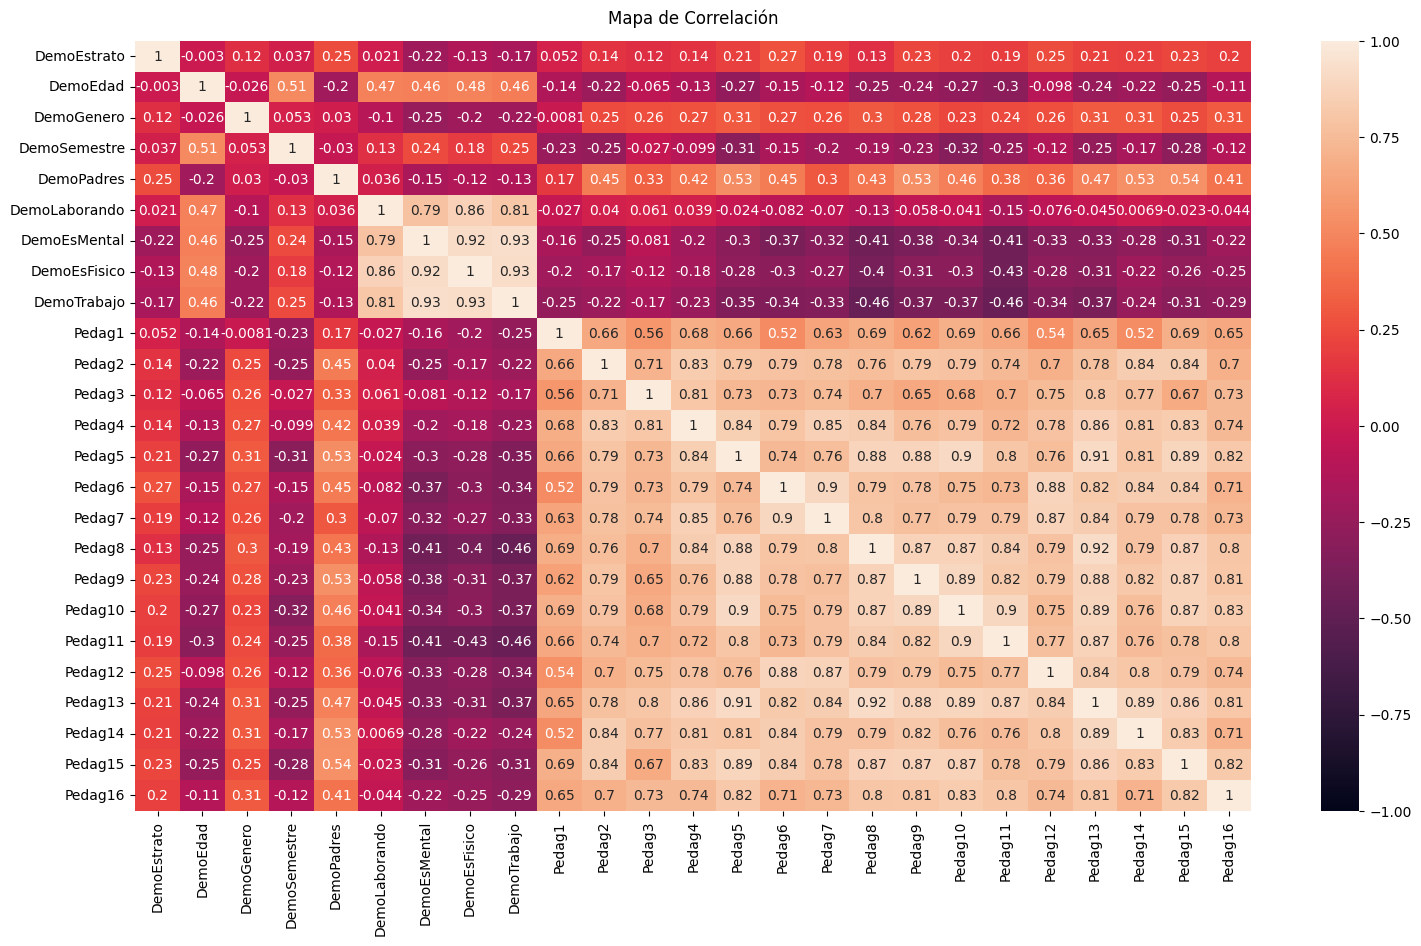

In [43]:
##https://www.kaggle.com/code/shashwatwork/guide-to-normality-tests-in-python
plt.figure(figsize=(18, 10))

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Mapa de Correlación', fontdict={'fontsize':12}, pad=12)

In [44]:
corr_matrix = X_train_norm_SMOTE.corr(method='pearson')

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
tidy_corr_matrix(corr_matrix).head(30)

variable_1    variable_2         r     abs_r
206   DemoTrabajo  DemoEsMental  0.934523  0.934523
158  DemoEsMental   DemoTrabajo  0.934523  0.934523
183  DemoEsFisico   DemoTrabajo  0.929626  0.929626
207   DemoTrabajo  DemoEsFisico  0.929626  0.929626
421        Pedag8       Pedag13  0.921157  0.921157
541       Pedag13        Pedag8  0.921157  0.921157
157  DemoEsMental  DemoEsFisico  0.915759  0.915759
181  DemoEsFisico  DemoEsMental  0.915759  0.915759
538       Pedag13        Pedag5  0.911839  0.911839
346        Pedag5       Pedag13  0.911839  0.911839
343        Pedag5       Pedag10  0.900141  0.900141
463       Pedag10        Pedag5  0.900141  0.900141
469       Pedag10       Pedag11  0.898403  0.898403
493       Pedag11       Pedag10  0.898403  0.898403
389        Pedag7        Pedag6  0.895454  0.895454
365        Pedag6        Pedag7  0.895454  0.895454
547       Pedag13       Pedag14  0.894894  0.894894
571       Pedag14       Pedag13  0.894894  0.894894
467       Pedag10        Pedag9  0.893614  0.893614
443        Pedag9       Pedag10  0.893614  0.893614
348        Pedag5       Pedag15  0.885658  0.885658
588       Pedag15        Pedag5  0.885658  0.885658
471       Pedag10       Pedag13  0.885109  0.885109
543       Pedag13       Pedag10  0.885109  0.885109
413        Pedag8        Pedag5  0.880618  0.880618
341        Pedag5        Pedag8  0.880618  0.880618
514       Pedag12        Pedag6  0.878424  0.878424
370        Pedag6       Pedag12  0.878424  0.878424
342        Pedag5        Pedag9  0.876212  0.876212
438        Pedag9        Pedag5  0.876212  0.876212

Text(0.5, 1.0, 'Mapa de Correlación')

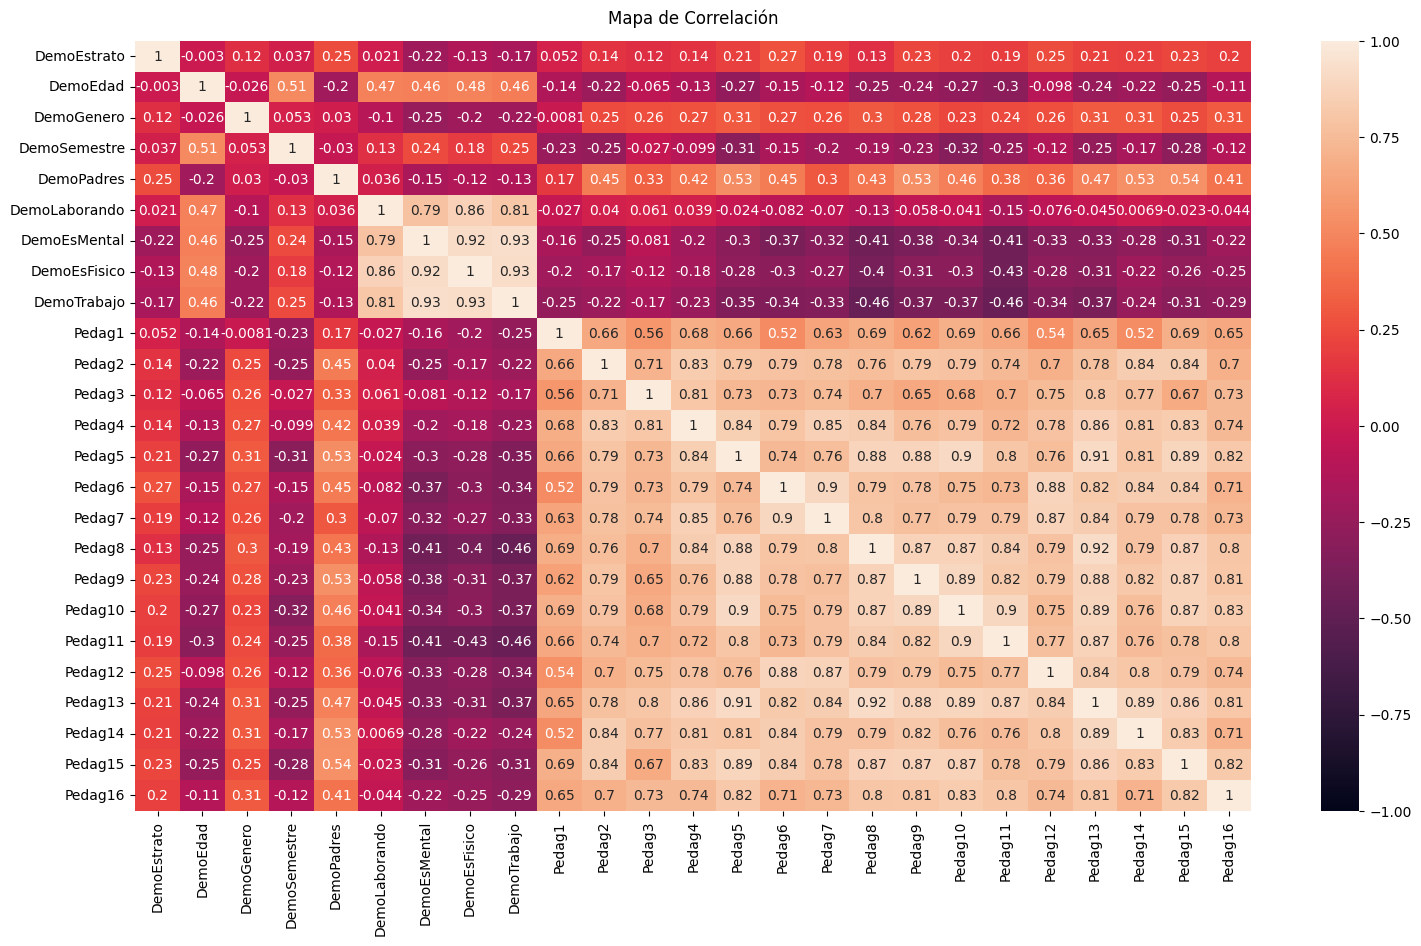

In [45]:
##https://www.kaggle.com/code/shashwatwork/guide-to-normality-tests-in-python
plt.figure(figsize=(18, 10))

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Mapa de Correlación', fontdict={'fontsize':12}, pad=12)

In [57]:
#!pip install pingouin
import pingouin as pg

pg.cronbach_alpha(data=X_train_norm_SMOTE)

datosOrg = X_train_norm_SMOTE[list(X_train_norm_SMOTE.columns)]

pg.cronbach_alpha(data=datosOrg)
##Instrumento super confiable con 0.89

(0.8951216342184275, array([0.866, 0.92 ]))

#### Normalizar datos trabajados con RESAMPLE

In [47]:
datosVie = data
dataLista = X_res_train_over

valores = dataLista.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=dataLista.columns)

normalizados = scaler.transform(valores)
X_train_norm_RES = pd.DataFrame(normalizados,
                              index=dataLista.index,
                              columns=dataLista.columns)

In [48]:
datosVie = data
dataLista = X_res_test_over

valores = dataLista.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=dataLista.columns)

normalizados = scaler.transform(valores)
X_test_norm_RES = pd.DataFrame(normalizados,
                              index=dataLista.index,
                              columns=dataLista.columns)

In [49]:
#Shapiro Wilk 
from scipy.stats import shapiro
valoresP=[]
concepto=[]
variable=[]

def iterarCol(df):
    for column in df:
        stat, p = shapiro(df[column].values)
        valoresP.append(p)
        variable.append(column)
        if (p < 0.05):
            #print(f'No es una variable Normal: {column}')
            #print('==========================================================')
            concepto.append('No es una variable Normal')
        else:
            #print(f'Es una variable Normal: {column}')
            #print('==========================================================')
            concepto.append('Es una variable Normal')
       
iterarCol(X_train_norm_RES)


df = pd.DataFrame({'Variable':variable, 'Valores P':valoresP, 'Concepto':concepto})

df

Variable     Valores P                   Concepto
0     DemoEstrato  5.198470e-13  No es una variable Normal
1        DemoEdad  7.844838e-12  No es una variable Normal
2      DemoGenero  3.099999e-16  No es una variable Normal
3    DemoSemestre  1.873488e-13  No es una variable Normal
4      DemoPadres  8.238210e-16  No es una variable Normal
5   DemoLaborando  1.123399e-16  No es una variable Normal
6    DemoEsMental  4.053462e-15  No es una variable Normal
7    DemoEsFisico  8.085760e-16  No es una variable Normal
8     DemoTrabajo  1.410191e-15  No es una variable Normal
9          Pedag1  4.241987e-13  No es una variable Normal
10         Pedag2  5.082566e-11  No es una variable Normal
11         Pedag3  6.876590e-14  No es una variable Normal
12         Pedag4  7.599340e-12  No es una variable Normal
13         Pedag5  2.684373e-13  No es una variable Normal
14         Pedag6  4.070657e-13  No es una variable Normal
15         Pedag7  2.985217e-11  No es una variable Normal
16         Pedag8  1.348791e-14  No es una variable Normal
17         Pedag9  4.215680e-13  No es una variable Normal
18        Pedag10  1.287563e-14  No es una variable Normal
19        Pedag11  2.443569e-14  No es una variable Normal
20        Pedag12  6.599071e-11  No es una variable Normal
21        Pedag13  3.084373e-13  No es una variable Normal
22        Pedag14  3.295838e-11  No es una variable Normal
23        Pedag15  7.791201e-12  No es una variable Normal
24        Pedag16  1.778312e-14  No es una variable Normal

In [50]:
iterarCol(X_test_norm_RES)


df = pd.DataFrame({'Variable':variable, 'Valores P':valoresP, 'Concepto':concepto})

df

Variable     Valores P                   Concepto
0     DemoEstrato  5.198470e-13  No es una variable Normal
1        DemoEdad  7.844838e-12  No es una variable Normal
2      DemoGenero  3.099999e-16  No es una variable Normal
3    DemoSemestre  1.873488e-13  No es una variable Normal
4      DemoPadres  8.238210e-16  No es una variable Normal
5   DemoLaborando  1.123399e-16  No es una variable Normal
6    DemoEsMental  4.053462e-15  No es una variable Normal
7    DemoEsFisico  8.085760e-16  No es una variable Normal
8     DemoTrabajo  1.410191e-15  No es una variable Normal
9          Pedag1  4.241987e-13  No es una variable Normal
10         Pedag2  5.082566e-11  No es una variable Normal
11         Pedag3  6.876590e-14  No es una variable Normal
12         Pedag4  7.599340e-12  No es una variable Normal
13         Pedag5  2.684373e-13  No es una variable Normal
14         Pedag6  4.070657e-13  No es una variable Normal
15         Pedag7  2.985217e-11  No es una variable Normal
16         Pedag8  1.348791e-14  No es una variable Normal
17         Pedag9  4.215680e-13  No es una variable Normal
18        Pedag10  1.287563e-14  No es una variable Normal
19        Pedag11  2.443569e-14  No es una variable Normal
20        Pedag12  6.599071e-11  No es una variable Normal
21        Pedag13  3.084373e-13  No es una variable Normal
22        Pedag14  3.295838e-11  No es una variable Normal
23        Pedag15  7.791201e-12  No es una variable Normal
24        Pedag16  1.778312e-14  No es una variable Normal
25    DemoEstrato  1.106514e-11  No es una variable Normal
26       DemoEdad  2.071411e-15  No es una variable Normal
27     DemoGenero  1.708697e-14  No es una variable Normal
28   DemoSemestre  5.662395e-13  No es una variable Normal
29     DemoPadres  5.971128e-14  No es una variable Normal
30  DemoLaborando  9.926469e-15  No es una variable Normal
31   DemoEsMental  4.428193e-14  No es una variable Normal
32   DemoEsFisico  6.027760e-14  No es una variable Normal
33    DemoTrabajo  1.662875e-14  No es una variable Normal
34         Pedag1  1.055540e-12  No es una variable Normal
35         Pedag2  1.571398e-11  No es una variable Normal
36         Pedag3  3.017903e-12  No es una variable Normal
37         Pedag4  2.022575e-10  No es una variable Normal
38         Pedag5  5.972008e-09  No es una variable Normal
39         Pedag6  7.748271e-11  No es una variable Normal
40         Pedag7  1.588447e-10  No es una variable Normal
41         Pedag8  9.060891e-11  No es una variable Normal
42         Pedag9  2.318529e-10  No es una variable Normal
43        Pedag10  1.295543e-10  No es una variable Normal
44        Pedag11  1.195827e-10  No es una variable Normal
45        Pedag12  3.189467e-10  No es una variable Normal
46        Pedag13  3.557616e-10  No es una variable Normal
47        Pedag14  2.726173e-09  No es una variable Normal
48        Pedag15  1.224120e-09  No es una variable Normal
49        Pedag16  3.141987e-09  No es una variable Normal

In [51]:
corr_matrix = X_train_norm_RES.corr(method='pearson')

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
tidy_corr_matrix(corr_matrix).head(30)

variable_1     variable_2         r     abs_r
132  DemoLaborando   DemoEsFisico  0.980497  0.980497
180   DemoEsFisico  DemoLaborando  0.980497  0.980497
133  DemoLaborando    DemoTrabajo  0.974536  0.974536
205    DemoTrabajo  DemoLaborando  0.974536  0.974536
207    DemoTrabajo   DemoEsFisico  0.964563  0.964563
183   DemoEsFisico    DemoTrabajo  0.964563  0.964563
131  DemoLaborando   DemoEsMental  0.963088  0.963088
155   DemoEsMental  DemoLaborando  0.963088  0.963088
157   DemoEsMental   DemoEsFisico  0.940816  0.940816
181   DemoEsFisico   DemoEsMental  0.940816  0.940816
206    DemoTrabajo   DemoEsMental  0.940278  0.940278
158   DemoEsMental    DemoTrabajo  0.940278  0.940278
395         Pedag7        Pedag12  0.932543  0.932543
515        Pedag12         Pedag7  0.932543  0.932543
493        Pedag11        Pedag10  0.930004  0.930004
469        Pedag10        Pedag11  0.930004  0.930004
463        Pedag10         Pedag5  0.915257  0.915257
343         Pedag5        Pedag10  0.915257  0.915257
443         Pedag9        Pedag10  0.914271  0.914271
467        Pedag10         Pedag9  0.914271  0.914271
389         Pedag7         Pedag6  0.910070  0.910070
365         Pedag6         Pedag7  0.910070  0.910070
541        Pedag13         Pedag8  0.905552  0.905552
421         Pedag8        Pedag13  0.905552  0.905552
538        Pedag13         Pedag5  0.899292  0.899292
346         Pedag5        Pedag13  0.899292  0.899292
496        Pedag11        Pedag13  0.896612  0.896612
544        Pedag13        Pedag11  0.896612  0.896612
618        Pedag16        Pedag10  0.889689  0.889689
474        Pedag10        Pedag16  0.889689  0.889689

Text(0.5, 1.0, 'Mapa de Correlación')

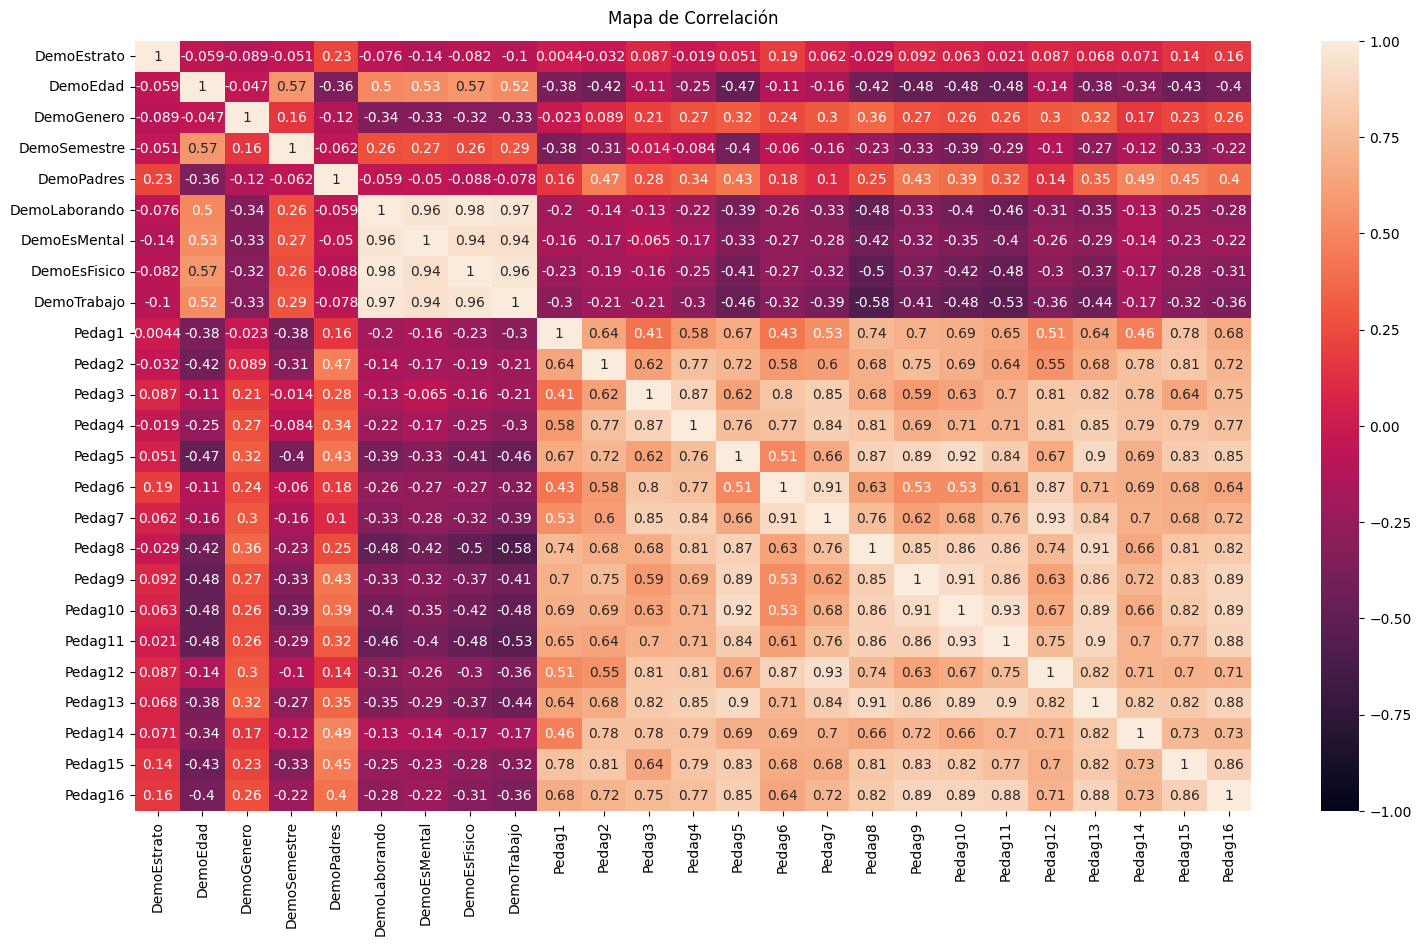

In [52]:
##https://www.kaggle.com/code/shashwatwork/guide-to-normality-tests-in-python
plt.figure(figsize=(18, 10))

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Mapa de Correlación', fontdict={'fontsize':12}, pad=12)

In [53]:
corr_matrix = X_test_norm_RES.corr(method='pearson')

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
tidy_corr_matrix(corr_matrix).head(30)

variable_1     variable_2         r     abs_r
131  DemoLaborando   DemoEsMental  0.985372  0.985372
155   DemoEsMental  DemoLaborando  0.985372  0.985372
206    DemoTrabajo   DemoEsMental  0.955767  0.955767
158   DemoEsMental    DemoTrabajo  0.955767  0.955767
183   DemoEsFisico    DemoTrabajo  0.936346  0.936346
207    DemoTrabajo   DemoEsFisico  0.936346  0.936346
132  DemoLaborando   DemoEsFisico  0.935653  0.935653
180   DemoEsFisico  DemoLaborando  0.935653  0.935653
489        Pedag11         Pedag6  0.931682  0.931682
369         Pedag6        Pedag11  0.931682  0.931682
133  DemoLaborando    DemoTrabajo  0.929559  0.929559
205    DemoTrabajo  DemoLaborando  0.929559  0.929559
181   DemoEsFisico   DemoEsMental  0.921496  0.921496
157   DemoEsMental   DemoEsFisico  0.921496  0.921496
310         Pedag4         Pedag2  0.897957  0.897957
262         Pedag2         Pedag4  0.897957  0.897957
622        Pedag16        Pedag14  0.875029  0.875029
574        Pedag14        Pedag16  0.875029  0.875029
517        Pedag12         Pedag9  0.865151  0.865151
445         Pedag9        Pedag12  0.865151  0.865151
441         Pedag9         Pedag8  0.862968  0.862968
417         Pedag8         Pedag9  0.862968  0.862968
523        Pedag12        Pedag15  0.859510  0.859510
595        Pedag15        Pedag12  0.859510  0.859510
443         Pedag9        Pedag10  0.858869  0.858869
467        Pedag10         Pedag9  0.858869  0.858869
599        Pedag15        Pedag16  0.856473  0.856473
623        Pedag16        Pedag15  0.856473  0.856473
617        Pedag16         Pedag9  0.828894  0.828894
449         Pedag9        Pedag16  0.828894  0.828894

Text(0.5, 1.0, 'Mapa de Correlación')

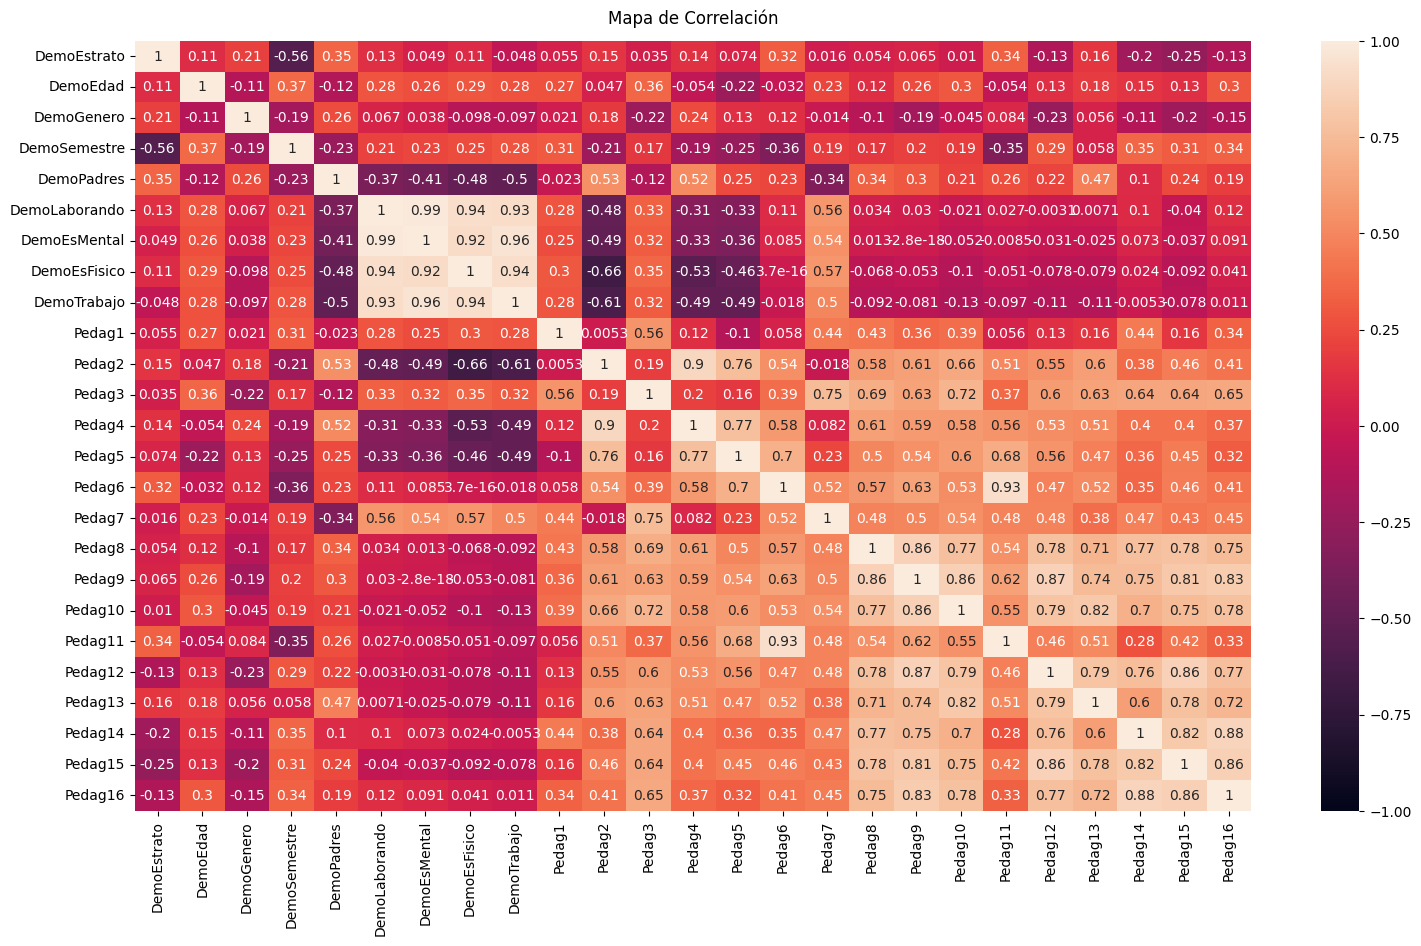

In [54]:
##https://www.kaggle.com/code/shashwatwork/guide-to-normality-tests-in-python
plt.figure(figsize=(18, 10))

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Mapa de Correlación', fontdict={'fontsize':12}, pad=12)

In [56]:
pg.cronbach_alpha(data=X_train_norm_RES)

datosOrg = X_train_norm_RES[list(X_train_norm_RES.columns)]

pg.cronbach_alpha(data=datosOrg)
##Instrumento super confiable con 0.89

(0.8438647761374315, array([0.801, 0.882]))

### Paso 5: Modelos Clasificacion sin y con Hiperparámetros, balanceado y sin mejores características

##### 1. Linear Discriminat Analysis: 60% train y 40% test

In [58]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_norm_RES, y_res_train_over)

# Predecir en el conjunto de prueba
y_pred = lda.predict(X_test_norm_RES)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.6555555555555556


In [59]:
from sklearn.metrics import classification_report
 
print(classification_report(y_res_test_over, y_pred))
#https://www.analyticsvidhya.com/blog/2021/08/a-brief-introduction-to-linear-discriminant-analysis/

              precision    recall  f1-score   support

           0       0.57      0.27      0.36        30
           1       0.75      0.70      0.72        30
           2       0.62      1.00      0.77        30

    accuracy                           0.66        90
   macro avg       0.65      0.66      0.62        90
weighted avg       0.65      0.66      0.62        90



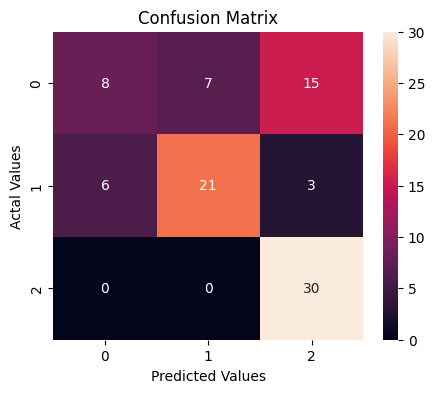

In [60]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_res_test_over, y_pred)

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()           

#### 1.1. Hiperparámetros LDA

In [61]:
# Crear el modelo
ldaHiper = LinearDiscriminantAnalysis()

# Definir el grid de hiperparámetros
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 1.0],  # shrinkage solo aplica para 'lsqr' y 'eigen'
    'n_components': [1, 2],  # Número de componentes
    'store_covariance': [True, False],
    'tol': [0.0001, 0.001, 0.01]
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(ldaHiper , param_grid, cv=5)

# Entrenar el modelo
grid_search.fit(X_train_norm_RES, y_res_train_over)

# Mejor modelo
best_lda = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_lda.predict(X_test_norm_RES)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Best parameters: {'n_components': 1, 'shrinkage': 'auto', 'solver': 'lsqr', 'store_covariance': True, 'tol': 0.0001}
Accuracy: 0.5666666666666667


In [62]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.53      0.58        30
           1       0.51      0.70      0.59        30
           2       0.58      0.47      0.52        30

    accuracy                           0.57        90
   macro avg       0.58      0.57      0.56        90
weighted avg       0.58      0.57      0.56        90



#### 2. Maquina de Soporte Vectorial SIN HIPERPARÁMETROS

Accuracy: 0.5666666666666667


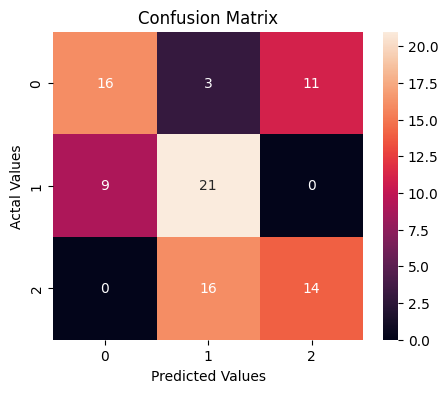

In [63]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Crear y entrenar el modelo
svc = SVC()
svc.fit(X_train_norm_RES, y_res_train_over)

# Predecir en el conjunto de prueba
y_pred = svc.predict(X_test_norm_RES)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Accuracy: {accuracy}')

confusion_matrix = metrics.confusion_matrix(y_res_test_over, y_pred)

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()       

In [64]:
from sklearn.metrics import classification_report
 
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.53      0.58        30
           1       0.53      0.70      0.60        30
           2       0.56      0.47      0.51        30

    accuracy                           0.57        90
   macro avg       0.58      0.57      0.56        90
weighted avg       0.57      0.57      0.56        90



#### 2.1. Maquina de Soporte Vectorial CON HIPERPARÁMETROS

In [65]:
# Crear el modelo
svc = SVC()

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # relevante solo para el kernel 'poly'
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Entrenar el modelo
grid_search.fit(X_train_norm_RES, y_res_train_over)

# Mejor modelo
best_svc = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_svc.predict(X_test_norm_RES)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Best parameters: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 0.5555555555555556


In [66]:
 
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.83      0.68        30
           1       0.39      0.37      0.38        30
           2       0.78      0.47      0.58        30

    accuracy                           0.56        90
   macro avg       0.58      0.56      0.55        90
weighted avg       0.58      0.56      0.55        90



### 3. Regresión Logistica Multinomial sin hiperparámetros

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train_norm_RES, y_res_train_over)

# Predecir en el conjunto de prueba
y_pred = logreg.predict(X_test_norm_RES)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.4777777777777778


In [68]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.43      0.46        30
           1       0.46      0.53      0.49        30
           2       0.50      0.47      0.48        30

    accuracy                           0.48        90
   macro avg       0.48      0.48      0.48        90
weighted avg       0.48      0.48      0.48        90



### 3.1. Regresión Logistica Multinomial con hiperparámetros

In [69]:
# Crear el modelo
logreg = LogisticRegression(multi_class='multinomial', max_iter=1000)

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty': ['l2', 'none'],  # 'none' solo está disponible para ciertos solvers
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(logreg, param_grid, cv=5)

# Entrenar el modelo
grid_search.fit(X_train_norm_RES, y_res_train_over)

# Mejor modelo
best_logreg = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_logreg.predict(X_test_norm_RES)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.5222222222222223


In [70]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.67      0.60        30
           1       0.43      0.43      0.43        30
           2       0.61      0.47      0.53        30

    accuracy                           0.52        90
   macro avg       0.53      0.52      0.52        90
weighted avg       0.53      0.52      0.52        90



### 4. Naive Bayes sin hiperparámetros

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
gnb = GaussianNB()
gnb.fit(X_train_norm_RES, y_res_train_over)

# Predecir en el conjunto de prueba
y_pred = gnb.predict(X_test_norm_RES)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.45555555555555555


In [72]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.67      0.55        30
           1       0.30      0.23      0.26        30
           2       0.58      0.47      0.52        30

    accuracy                           0.46        90
   macro avg       0.45      0.46      0.44        90
weighted avg       0.45      0.46      0.44        90



### 4.1. Naive Bayes con hiperparámetros

In [73]:
# Crear el modelo
gnb = GaussianNB()

# Definir el grid de hiperparámetros
param_grid = {
    'var_smoothing': np.logspace(-9, 0, 10)
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(gnb, param_grid, cv=5)

# Entrenar el modelo
grid_search.fit(X_train_norm_RES, y_res_train_over)

# Mejor modelo
best_gnb = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_gnb.predict(X_test_norm_RES)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')


Best parameters: {'var_smoothing': 0.01}
Accuracy: 0.45555555555555555


In [74]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.67      0.55        30
           1       0.30      0.23      0.26        30
           2       0.58      0.47      0.52        30

    accuracy                           0.46        90
   macro avg       0.45      0.46      0.44        90
weighted avg       0.45      0.46      0.44        90



### 5. Random Forest sin hiperparámetros

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
rf = RandomForestClassifier()
rf.fit(X_train_norm_RES, y_res_train_over)

# Predecir en el conjunto de prueba
y_pred = rf.predict(X_test_norm_RES)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.4888888888888889


In [76]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.77      0.61        30
           1       0.57      0.70      0.63        30
           2       0.00      0.00      0.00        30

    accuracy                           0.49        90
   macro avg       0.36      0.49      0.41        90
weighted avg       0.36      0.49      0.41        90



### 5.1. Random Forest con hiperparámetros

In [77]:
# Crear el modelo
rf = RandomForestClassifier()

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train_norm_RES, y_res_train_over)

# Mejor modelo
best_rf = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_rf.predict(X_test_norm_RES)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total ti

In [78]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.87      0.58        30
           1       0.37      0.33      0.35        30
           2       0.00      0.00      0.00        30

    accuracy                           0.40        90
   macro avg       0.27      0.40      0.31        90
weighted avg       0.27      0.40      0.31        90



### 6. XGBoost sin hiperparámetros

In [79]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_norm_RES, y_res_train_over)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_norm_RES)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.3333333333333333


In [80]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.47      0.39        30
           1       0.41      0.53      0.46        30
           2       0.00      0.00      0.00        30

    accuracy                           0.33        90
   macro avg       0.25      0.33      0.28        90
weighted avg       0.25      0.33      0.28        90



### 6.1.  XGBoost con hiperparámetros

In [81]:
# Crear el modelo
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train_norm_RES, y_res_train_over)

# Mejor modelo
best_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test_norm_RES)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsampl

In [82]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.43      0.38        30
           1       0.42      0.53      0.47        30
           2       0.00      0.00      0.00        30

    accuracy                           0.32        90
   macro avg       0.25      0.32      0.28        90
weighted avg       0.25      0.32      0.28        90



### 7.  GBM sin hiperparámetros

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear y entrenar el modelo
gbm = GradientBoostingClassifier()
gbm.fit(X_train_norm_RES, y_res_train_over)

# Predecir en el conjunto de prueba
y_pred = gbm.predict(X_test_norm_RES)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.5111111111111111


In [84]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.70      0.60        30
           1       0.57      0.83      0.68        30
           2       0.00      0.00      0.00        30

    accuracy                           0.51        90
   macro avg       0.36      0.51      0.43        90
weighted avg       0.36      0.51      0.43        90



### 7.1.  GBM con hiperparámetros

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score

# Crear el modelo
gbm = GradientBoostingClassifier()

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train_norm_RES, y_res_train_over)

# Mejor modelo
best_gbm = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_gbm.predict(X_test_norm_RES)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=1.0; total time=   0.2

In [86]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.60      0.49        30
           1       0.47      0.63      0.54        30
           2       0.00      0.00      0.00        30

    accuracy                           0.41        90
   macro avg       0.30      0.41      0.35        90
weighted avg       0.30      0.41      0.35        90



### 8. Redes Neuronales sin hiperparámetros

In [87]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_norm_RES, y_res_train_over)

# Predecir en el conjunto de prueba
y_pred = mlp.predict(X_test_norm_RES)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.5666666666666667


In [88]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.53      0.58        30
           1       0.51      0.70      0.59        30
           2       0.58      0.47      0.52        30

    accuracy                           0.57        90
   macro avg       0.58      0.57      0.56        90
weighted avg       0.58      0.57      0.56        90



### 8.1. Redes Neuronales con hiperparámetros

In [89]:
# Crear el modelo
mlp = MLPClassifier(random_state=42, early_stopping=True)

# Definir el grid de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train_norm_RES, y_res_train_over)

# Mejor modelo
best_mlp = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_mlp.predict(X_test_norm_RES)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, alpha=0.0001, 

In [90]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.47      0.44        30
           1       0.32      0.27      0.29        30
           2       0.45      0.47      0.46        30

    accuracy                           0.40        90
   macro avg       0.39      0.40      0.40        90
weighted avg       0.39      0.40      0.40        90

